In [1]:
%%capture
import pickle
import numpy as np
import math
import scipy as sp
from EM import EM
from plot import plot
from preprocess import preprocess
#from EM_individual_params import EM 

### TO DO 
* Double check code for data analysis for treatments
* Write out EM likelihood for checking convergence
* Put data analysis code after preprocess also in source data analysis notebook

### Modeling choices (which generates the lowest MSE and the plots in write up)
* Cutoff (only consider the data point with at least certain number of observations): 5 --> 2214 data points, 215 bins
* Bin size (length of time interval used to bin the time series): 18 hrs
* Parameters initialization
    * Both treatment and static coefficients: Gaussian with mean 0.1 plus small white noise
* Missingness
    * After binning the data, only consider the data points with less than 40% missing observations
* Chronic conditions and age
    * Set to zero

Coefficients learned with best population level results
* Coefficient for nsaid: [0.31291354 0.11150224 0.02927106]
* Coefficient for transfusion_plasma: [0.21646024 0.12142273 0.07316288]
* Coefficient for transfusion_platelet: [-0.24024057 -0.41378184 -0.28599656]
* Coefficient for anticoagulant: [-0.04605939  0.15568198  0.06412978]
* Coefficient for aspirin: [0.25202486 0.1102651  0.03499285]

Coefficients (jointly) learned with best population level results
* Coefficient for nsaid: [ 0.09144572  0.01808053 -0.00736706]
* Coefficient for transfusion_plasma: [-0.29370552 -0.15658492 -0.12820925]
* Coefficient for transfusion_platelet: [-0.32318352 -0.44511952 -0.43787362]
* Coefficient for anticoagulant: [-0.46557922  0.00142221 -0.02525039]
* Coefficient for aspirin: [-0.04017403 -0.04024049 -0.00733096]
* Coefficient for chronic kidney failure: 0.27480724324859296
* Coefficient for sickle cell: 0.238516267304465
* Coefficient for age: 0.01752724784756275

In [2]:
# Preprocess Setting
bin_size = 60 * 18
cutoff = 5
missing_pct = .4
c_zero = False

# EM Setting
num_past_effects = 3
training_pct = .8
single_effect = False

In [3]:
data = pickle.load(open('../Data/unimputed_inr_patient_data.pkl', 'rb'), encoding='latin1')

In [4]:
y, X, c = preprocess(data, cutoff, bin_size, missing_pct=missing_pct, c_zero=c_zero)

In [5]:
y.shape

(2214, 215)

### Reasons for Errors
* Assume the a single set of parameters generate all the data. This assumption could be violated since:
    1. Each patient respond to treatment differently
    2. Different treatment and chronic conditions may have various interaction effects on different individuals
* After changing treatment coefficients to be on individual level, the average coefficients are similar to the case of population level coefficients. The fit on some plots improve slightly but not much.  
* Assume observed value is well explained by the treatment and chronic variable. whereas in reality there might be other variable that contributes to the observed
* Assume linear transition, emission and treatment/chronic effects
* Seeing from the data, treatments don't seem to show clear effects on INR, from plots and from calculations.

In [6]:
em = EM(y, X, c, num_past_effects, 0, train_pct=training_pct, single_effect=single_effect)

In [7]:
%%time
em.run_EM(2000)

89 iterations before convergence
CPU times: user 1min 27s, sys: 3.07 s, total: 1min 30s
Wall time: 36.6 s


In [8]:
em.get_MSE()

0.7525663335484661

In [9]:
treatment_types = ['nsaid', 'transfusion_plasma', 'transfusion_platelet', 'anticoagulant', 'aspirin']
for i, treatment in enumerate(treatment_types):
    print('Coefficient for {}: {}'.format(treatment, em.A[:, i]))
static_types = ['chronic kidney failure', 'sickle cell', 'age']
for j, static in enumerate(static_types):
    print('Coefficient for {}: {}'.format(static, em.b[j]))

Coefficient for nsaid: [ 0.0284535   0.01699927 -0.00572211]
Coefficient for transfusion_plasma: [-0.40593833 -0.19812518 -0.15264801]
Coefficient for transfusion_platelet: [-0.62364803 -0.71003415 -0.58967166]
Coefficient for anticoagulant: [-0.63051592 -0.06031161 -0.07395586]
Coefficient for aspirin: [-0.03806106 -0.03063705  0.0261059 ]
Coefficient for chronic kidney failure: -0.20876116889460086
Coefficient for sickle cell: -0.5286262898587142
Coefficient for age: -0.01995105021073292


Patient 512


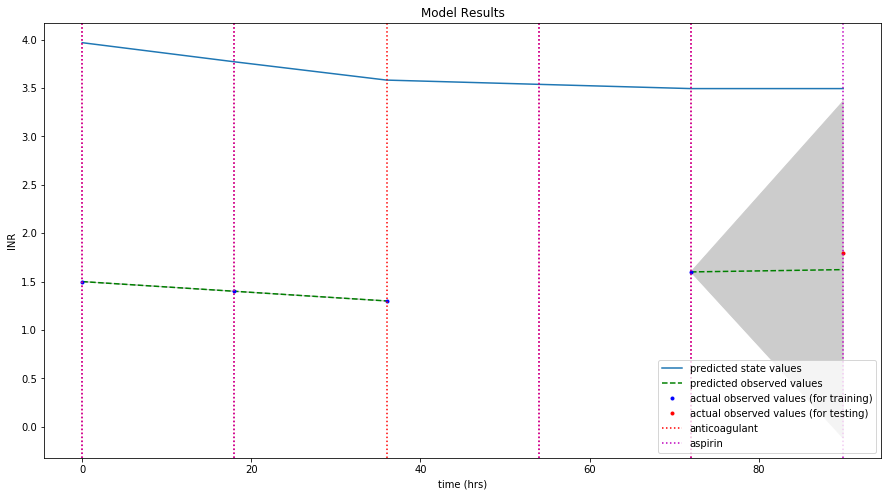

Patient 1273


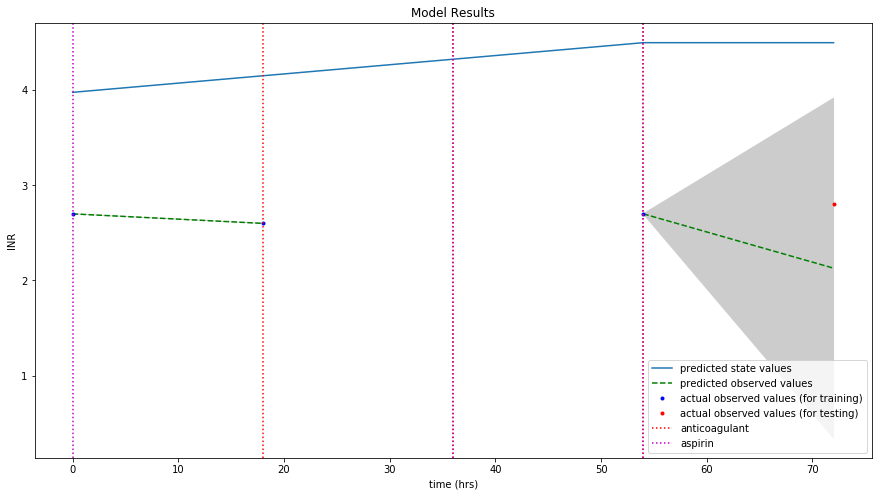

Patient 601


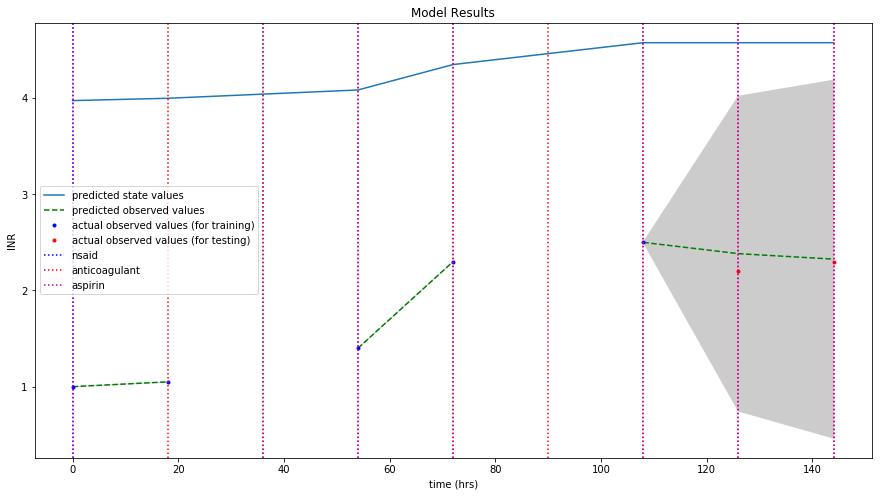

Patient 2010


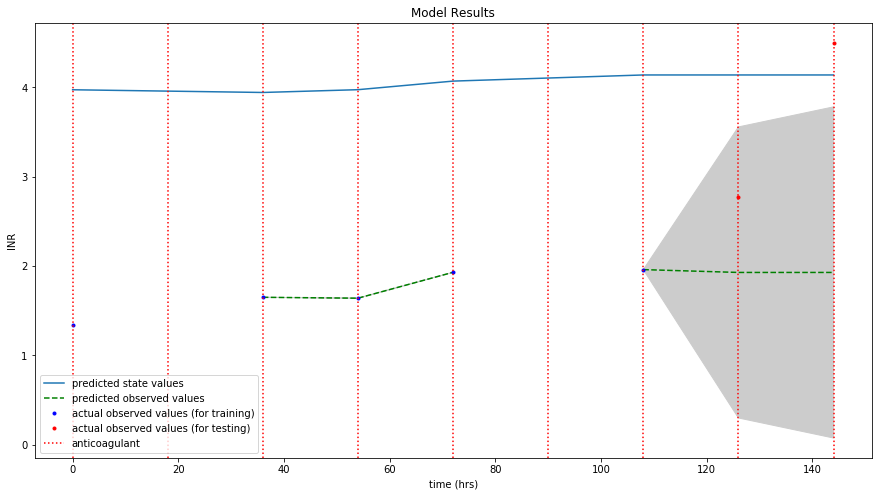

Patient 114


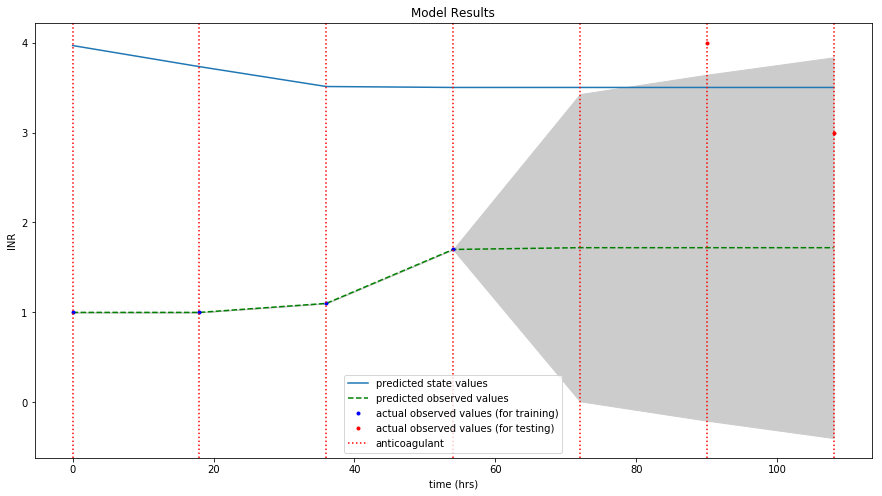

Patient 1132


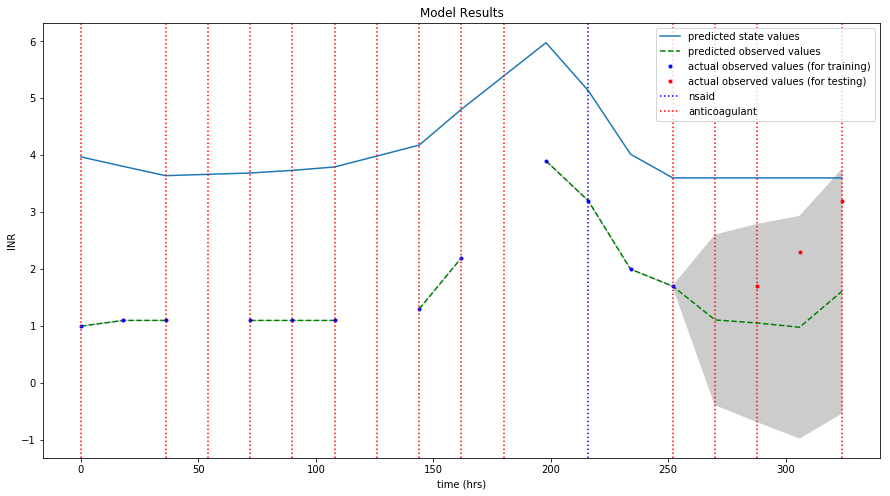

Patient 218


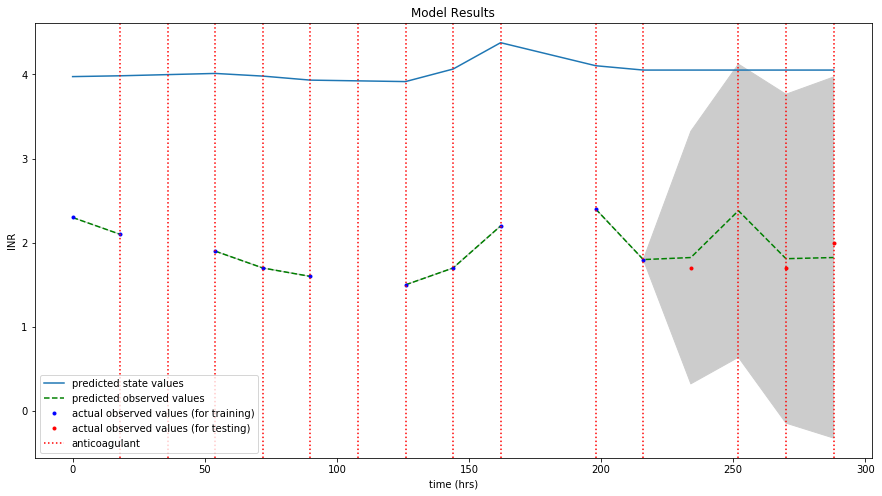

Patient 353


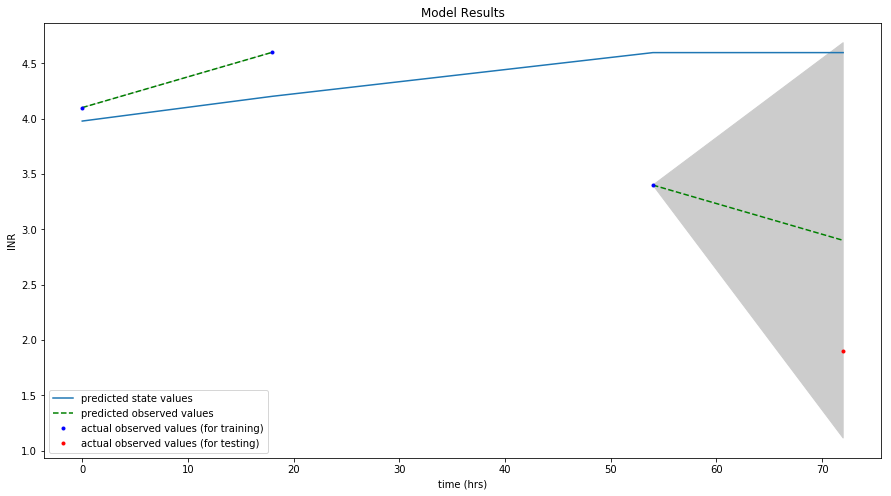

Patient 1315


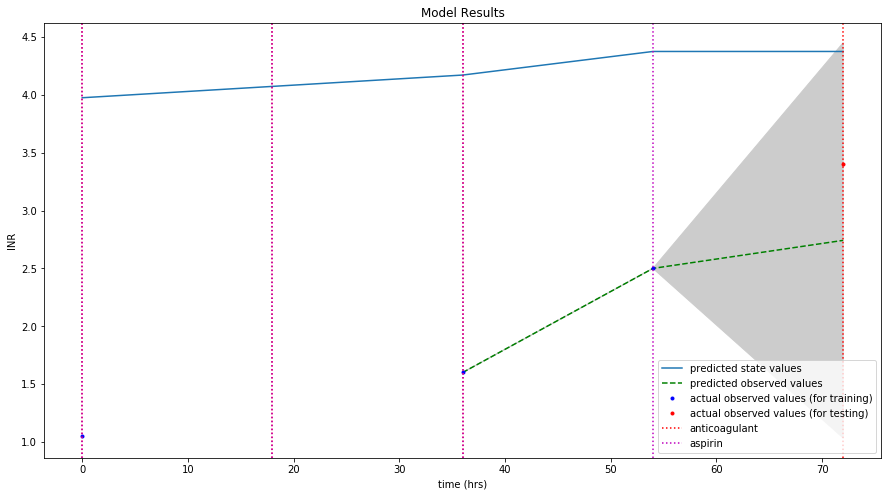

Patient 642


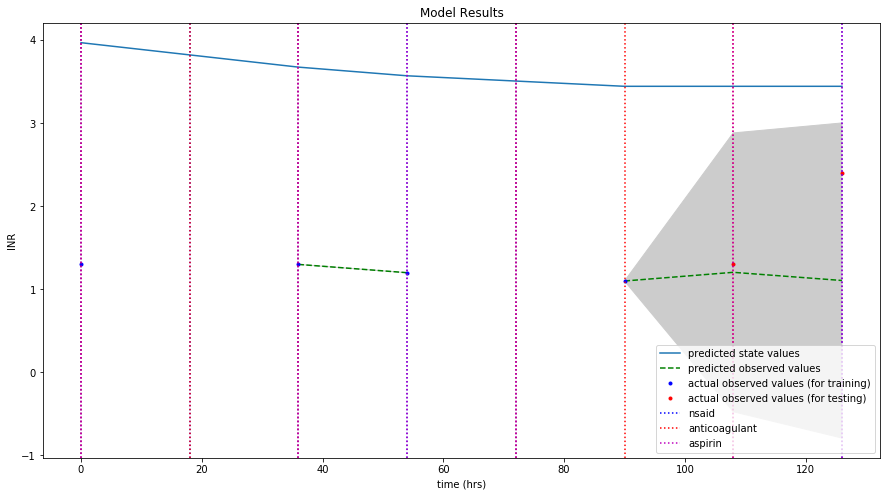

Patient 1453


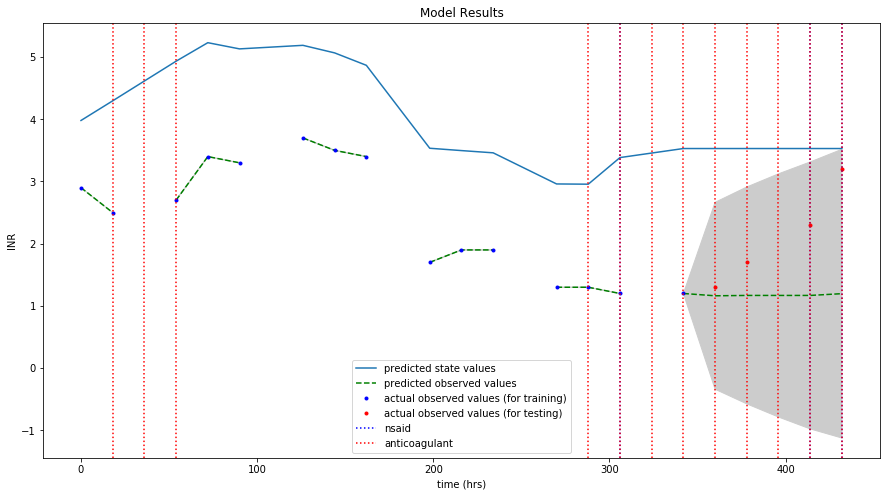

Patient 548


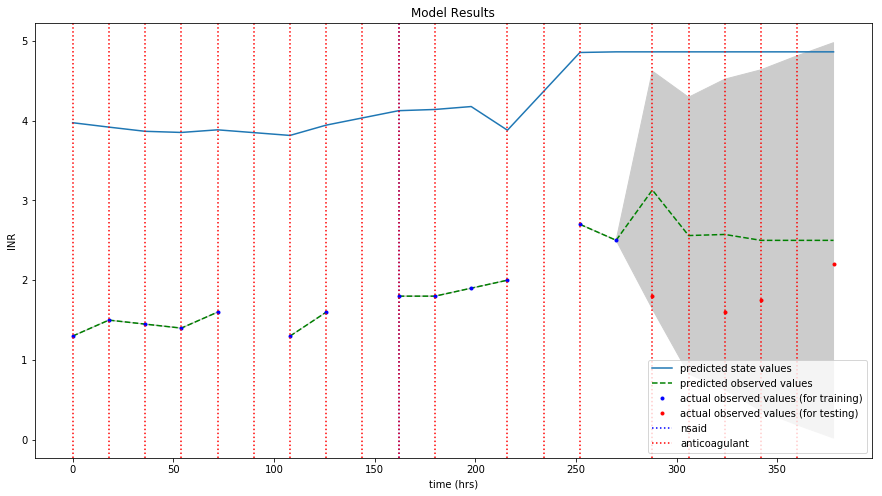

Patient 1595


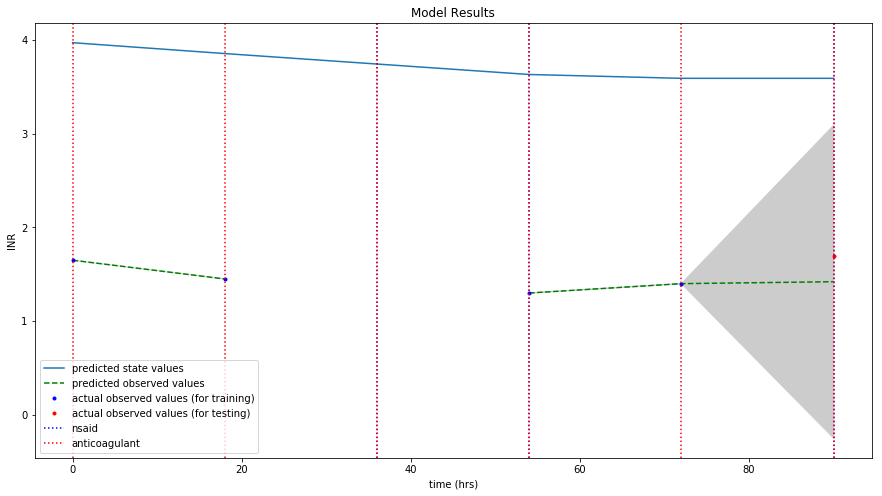

Patient 409


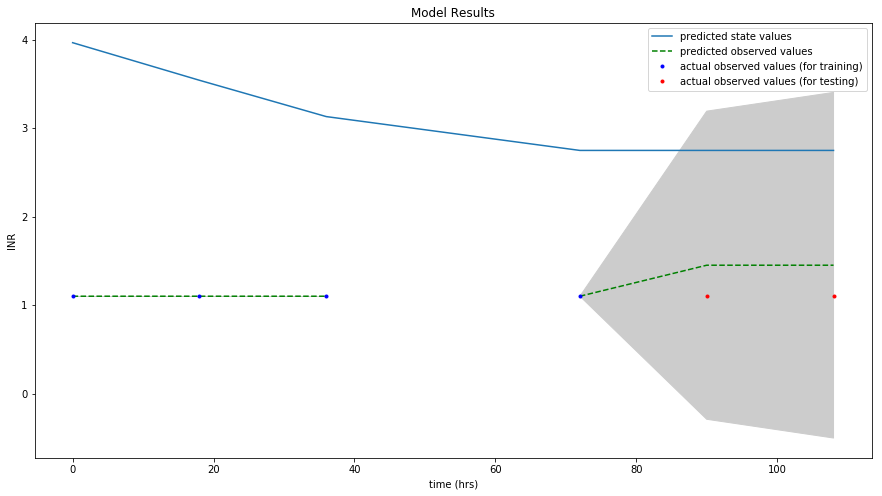

Patient 20


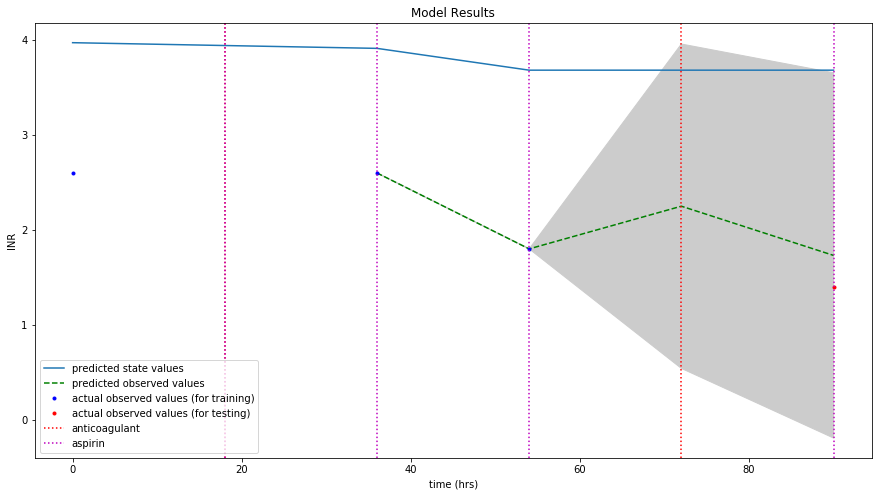

Patient 1071


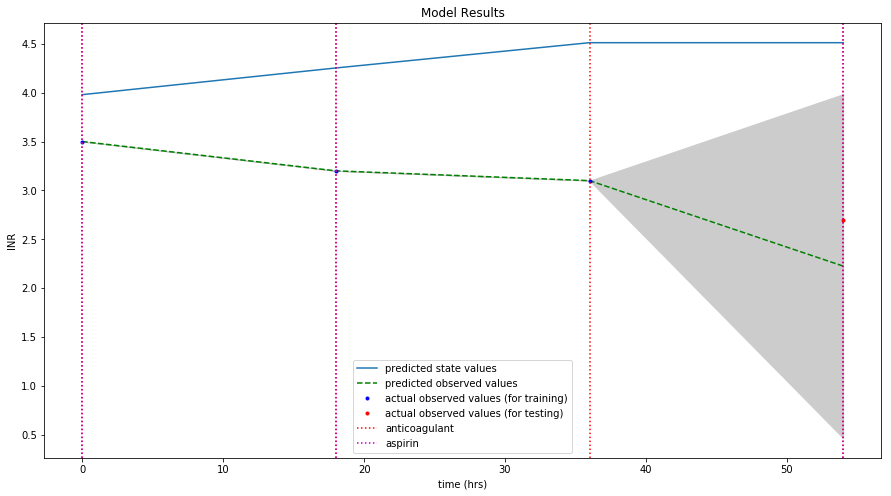

Patient 6


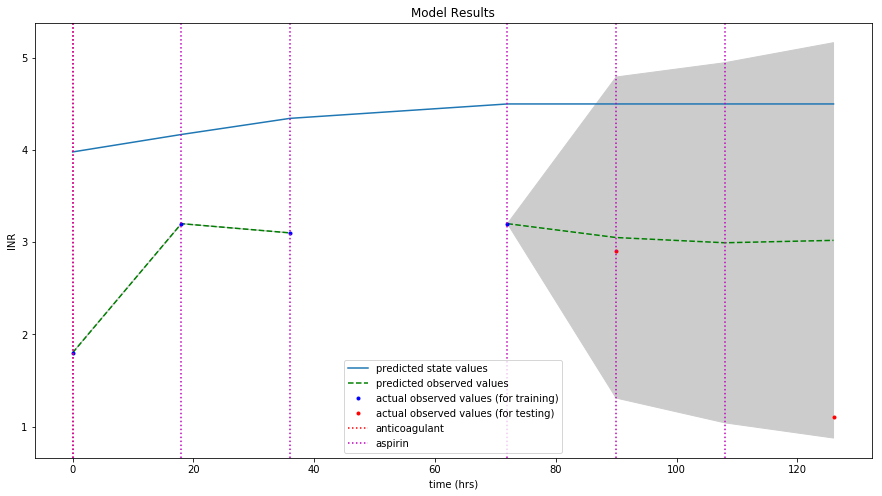

Patient 157


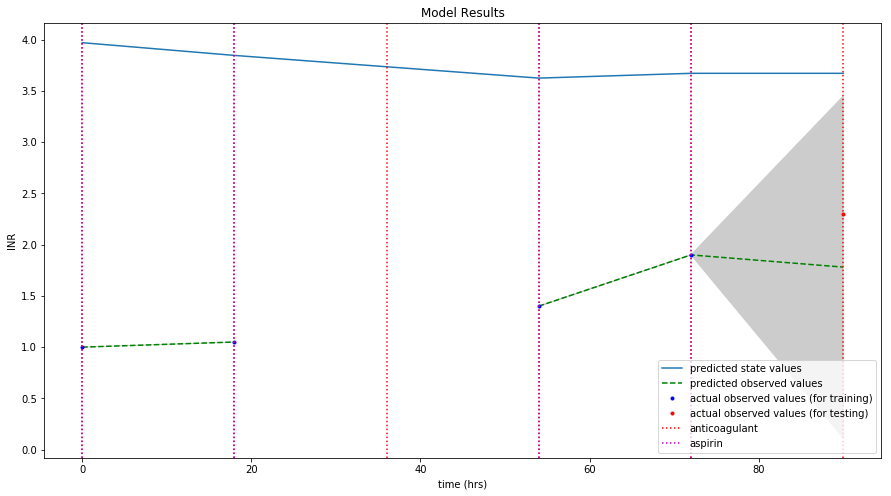

Patient 1182


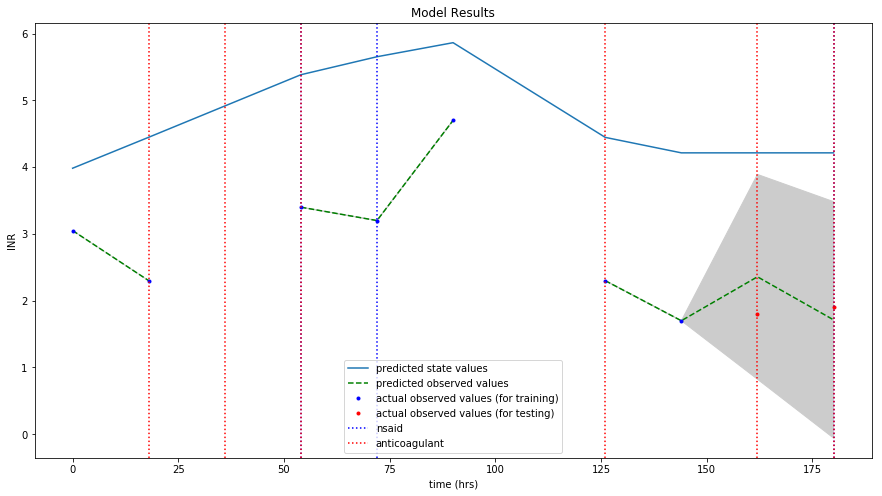

Patient 1064


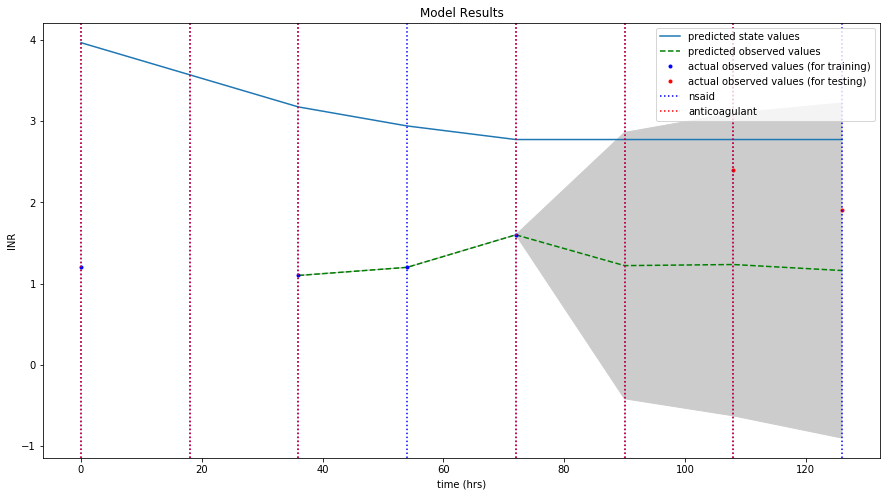

Patient 889


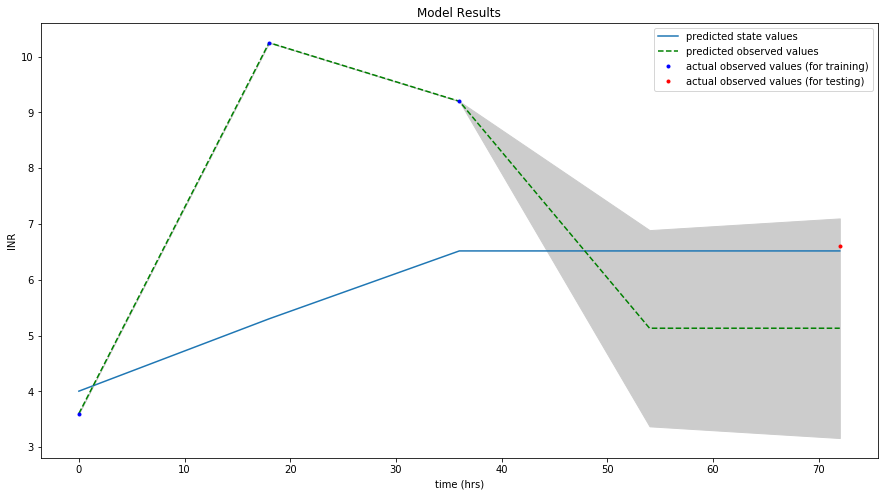

Patient 2122


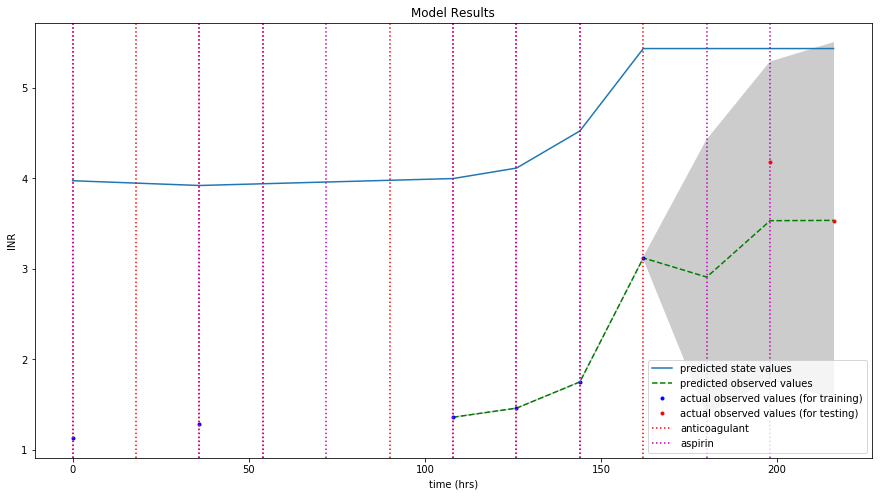

Patient 2183


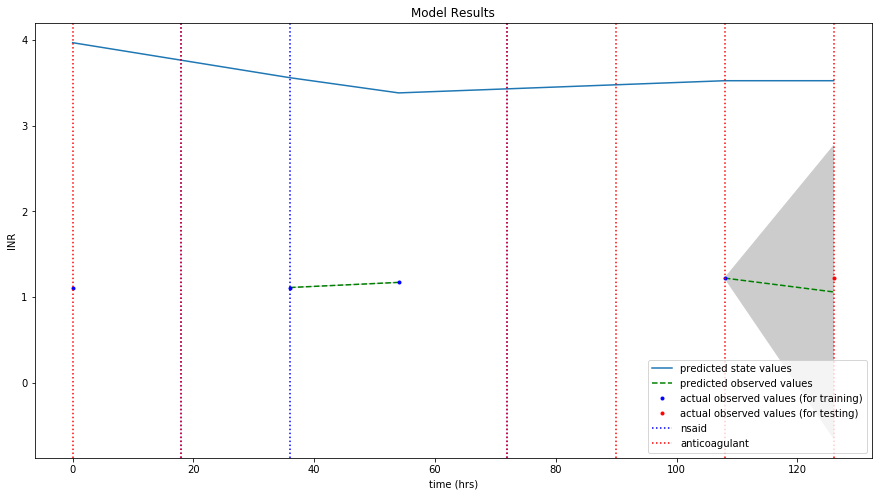

Patient 113


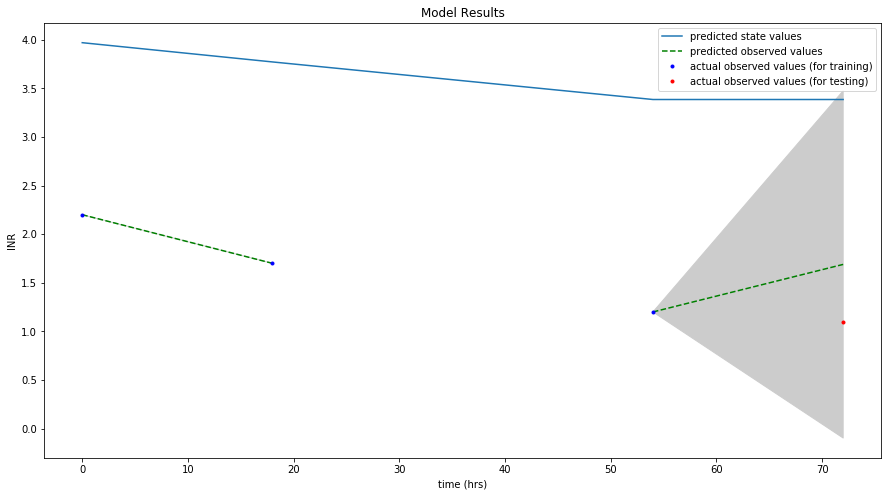

Patient 112


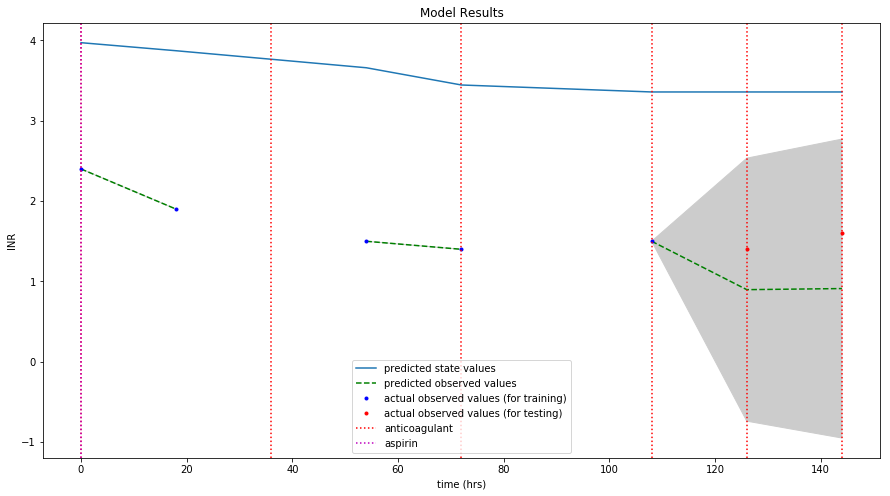

Patient 2143


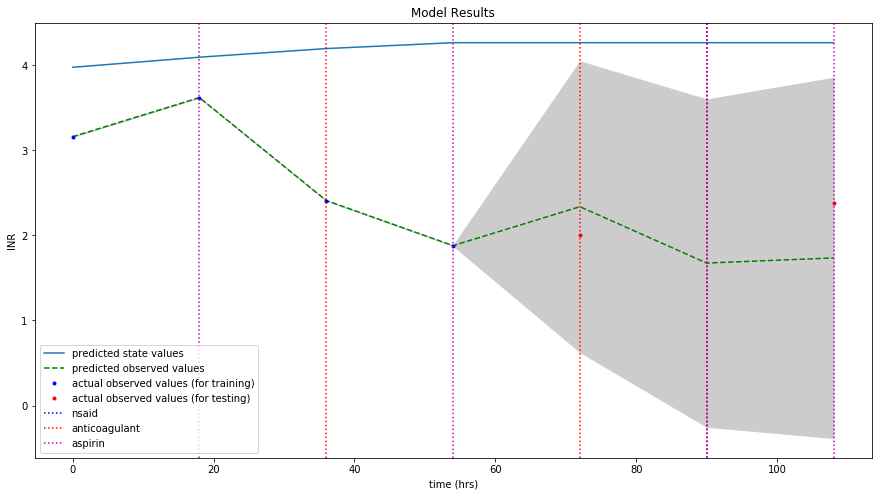

Patient 312


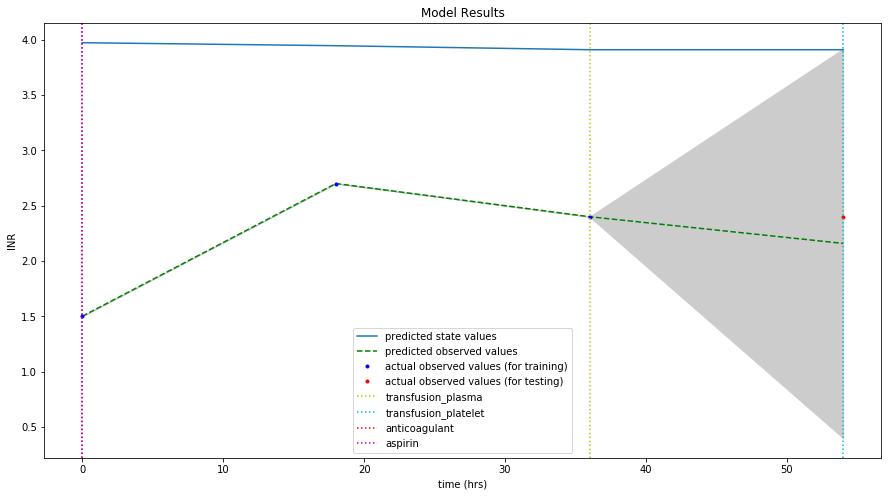

Patient 1571


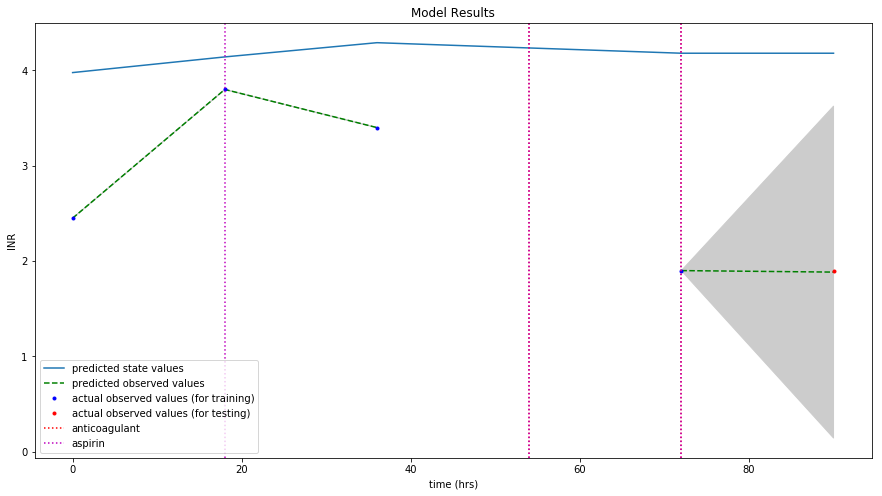

Patient 1566


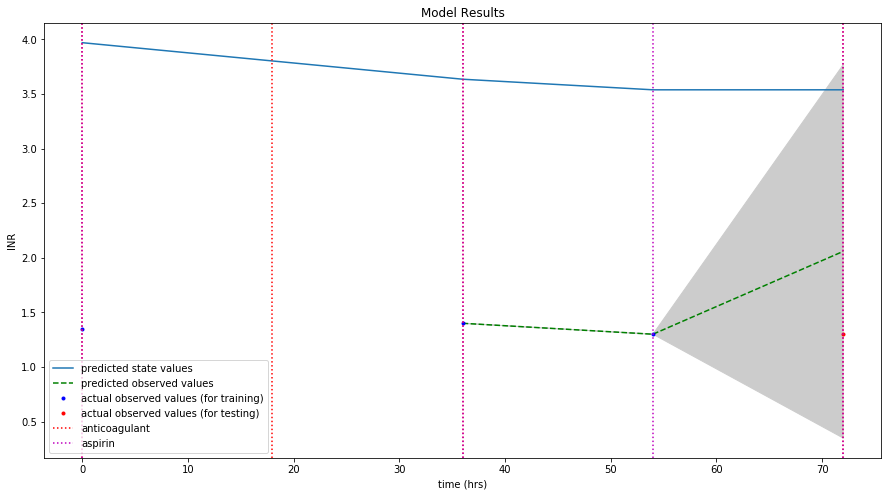

Patient 1865


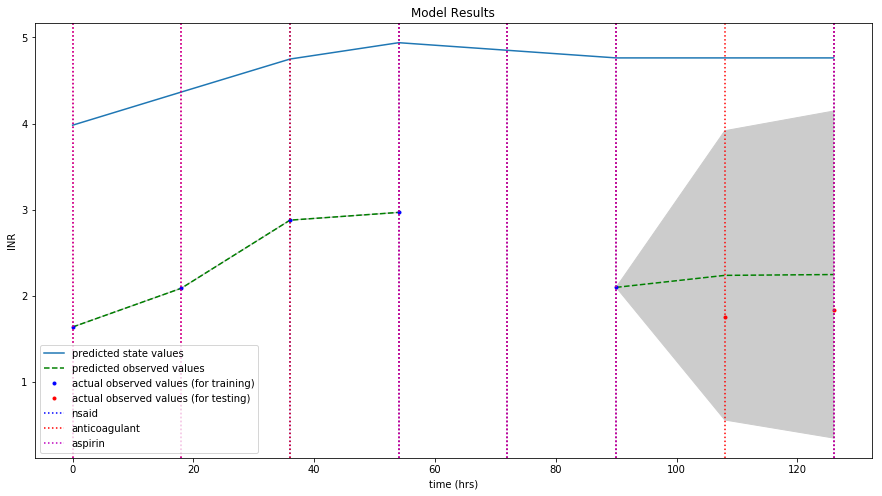

Patient 1672


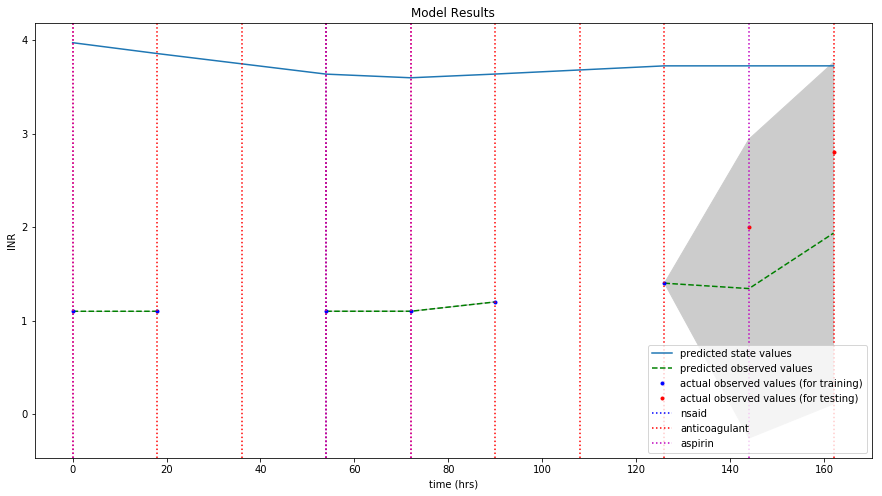

Patient 1644


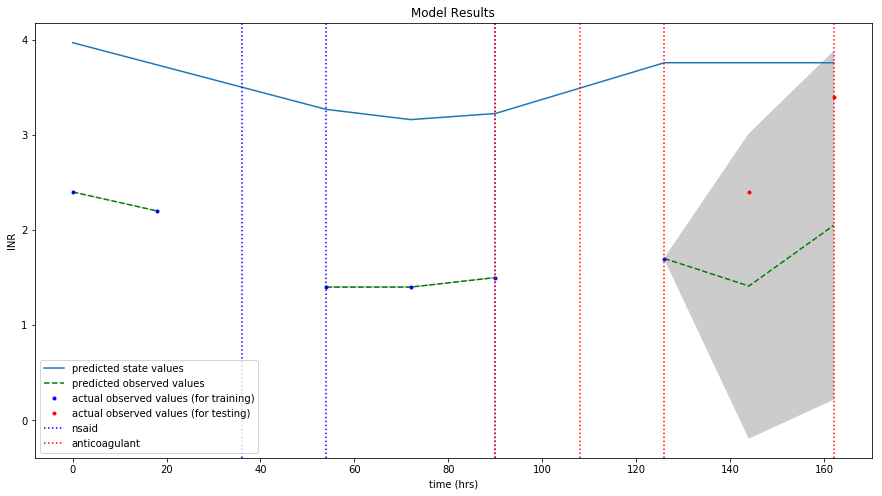

Patient 655


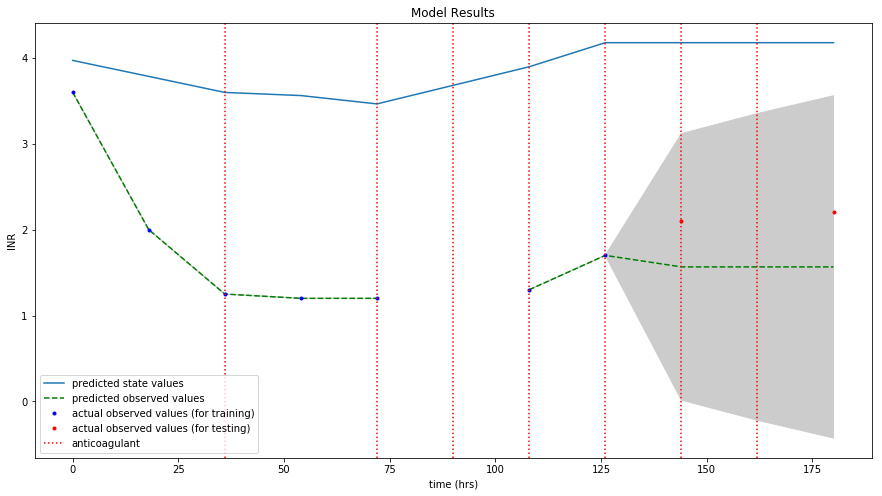

Patient 1724


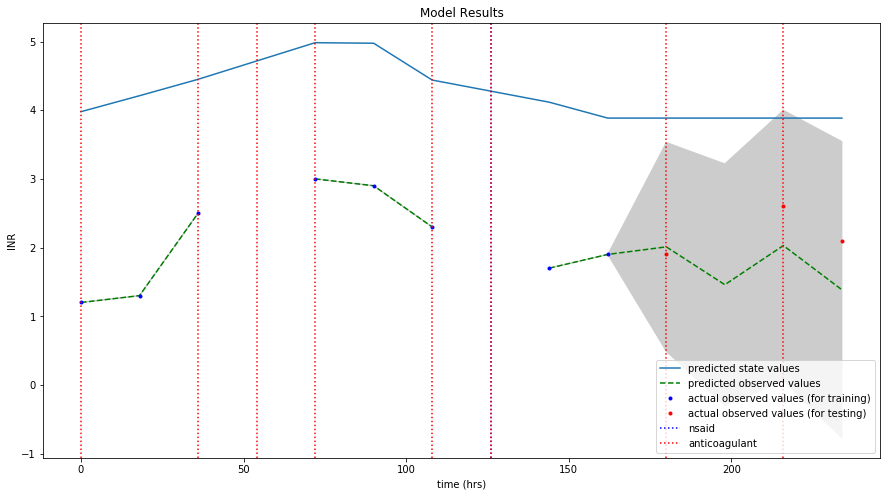

Patient 965


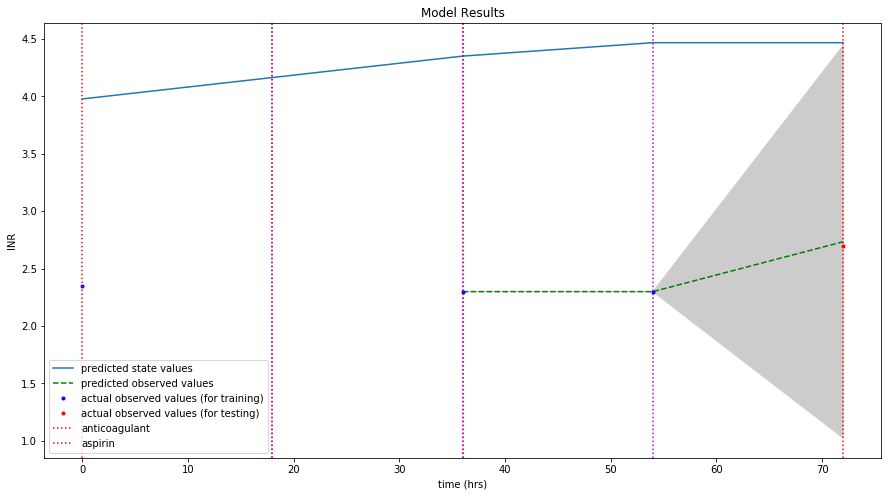

Patient 2029


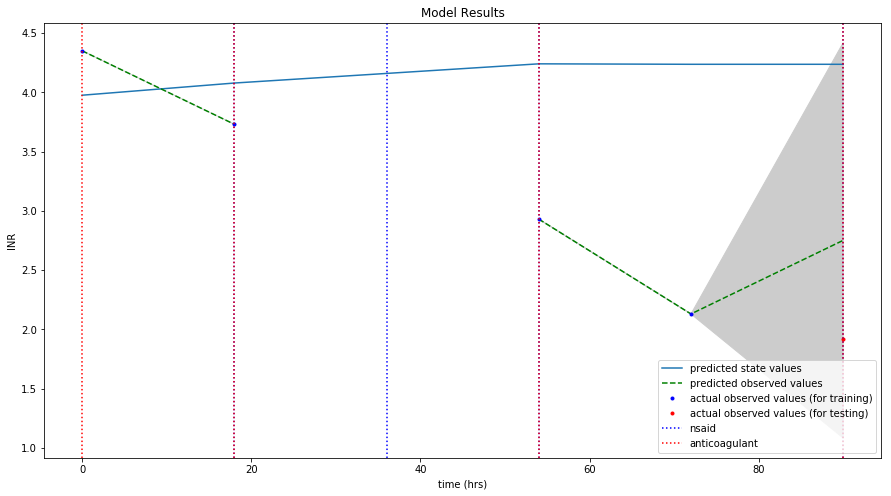

Patient 1369


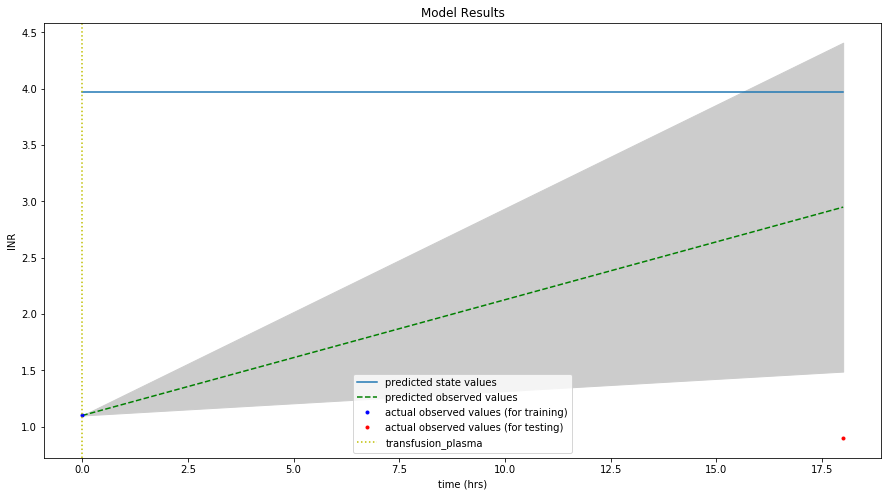

Patient 1175


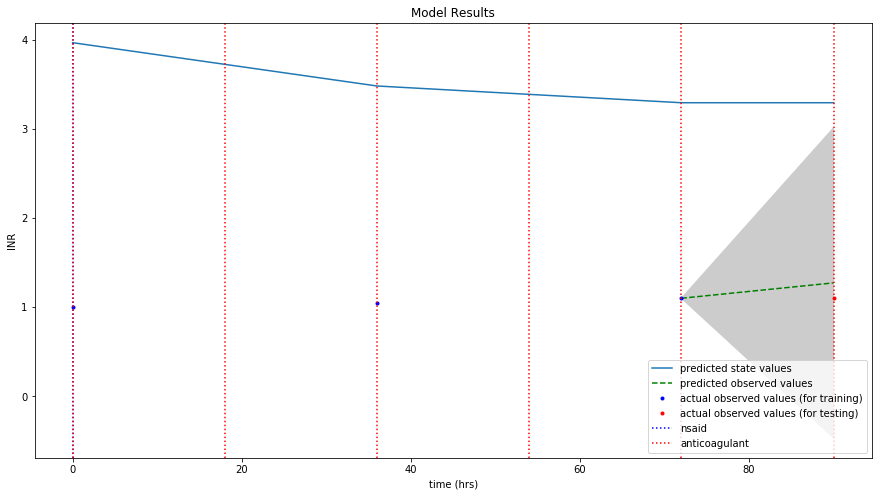

Patient 1253


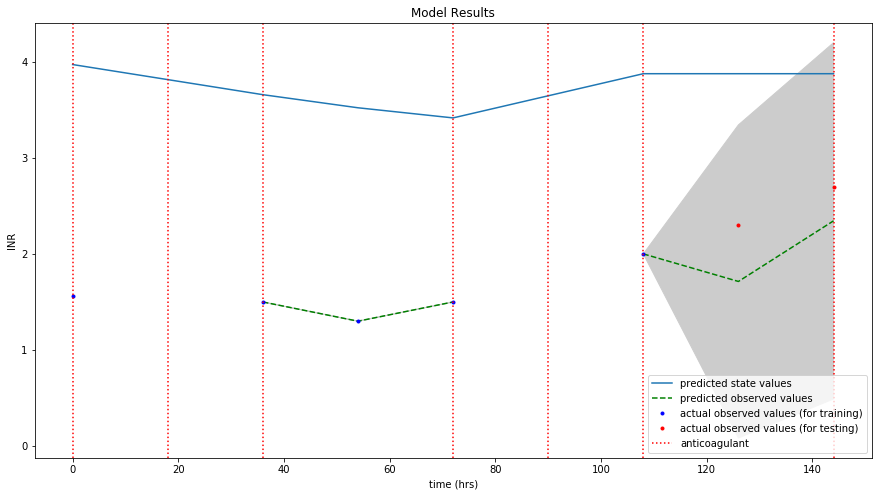

Patient 402


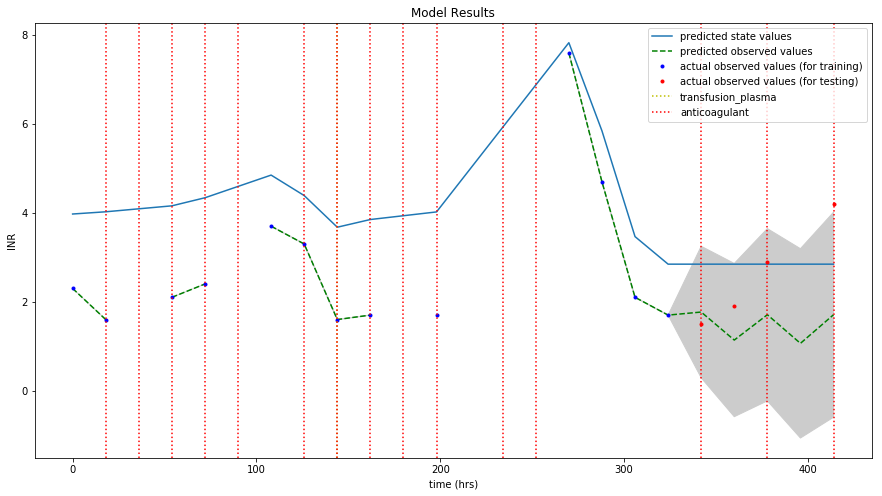

Patient 1743


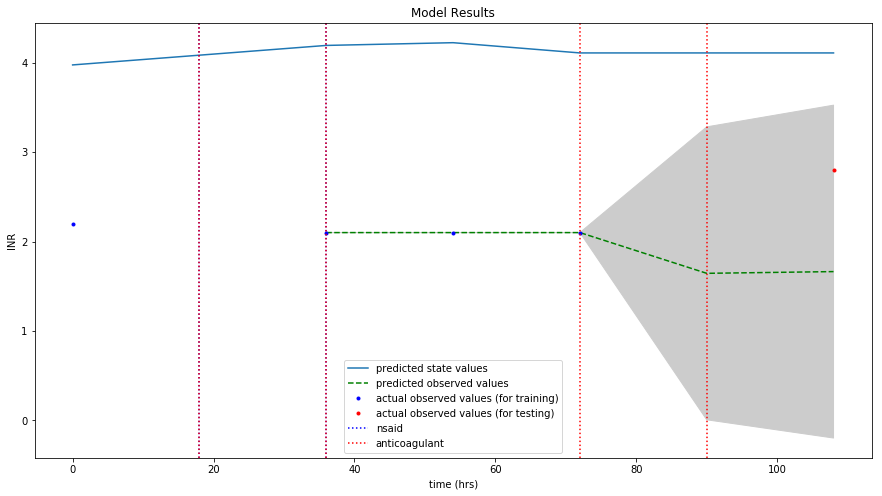

Patient 251


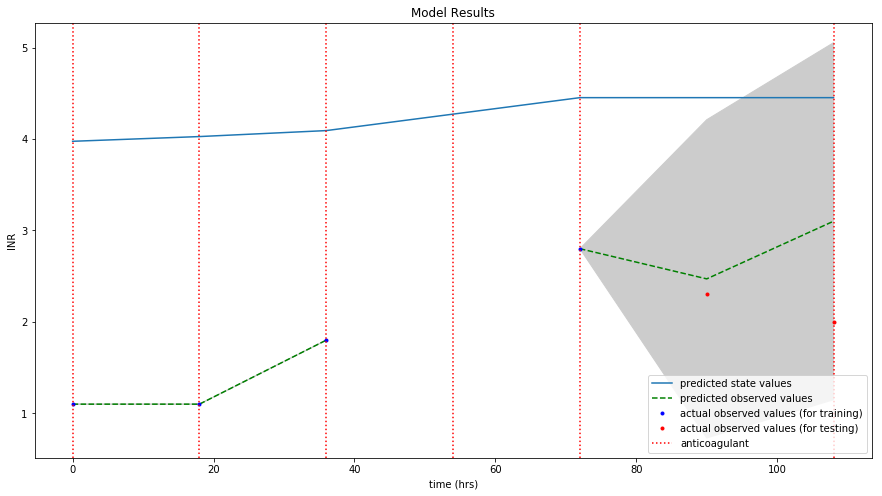

Patient 683


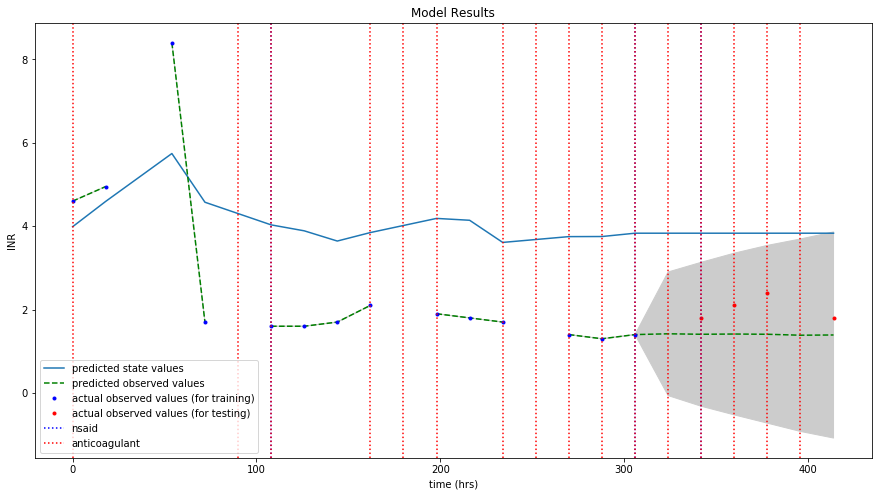

Patient 2113


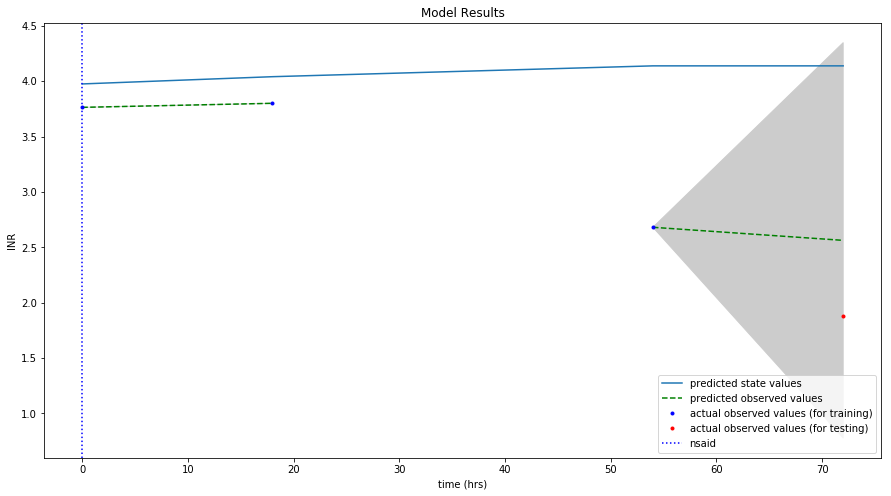

Patient 1004


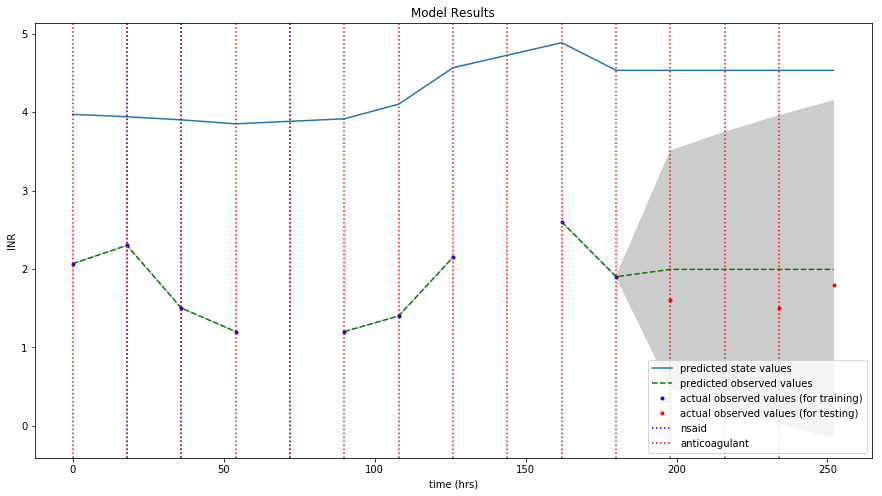

Patient 402


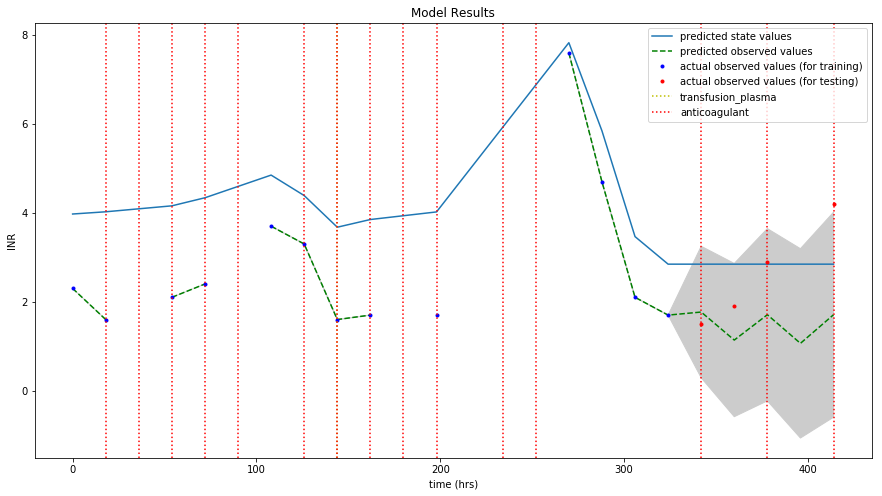

Patient 1085


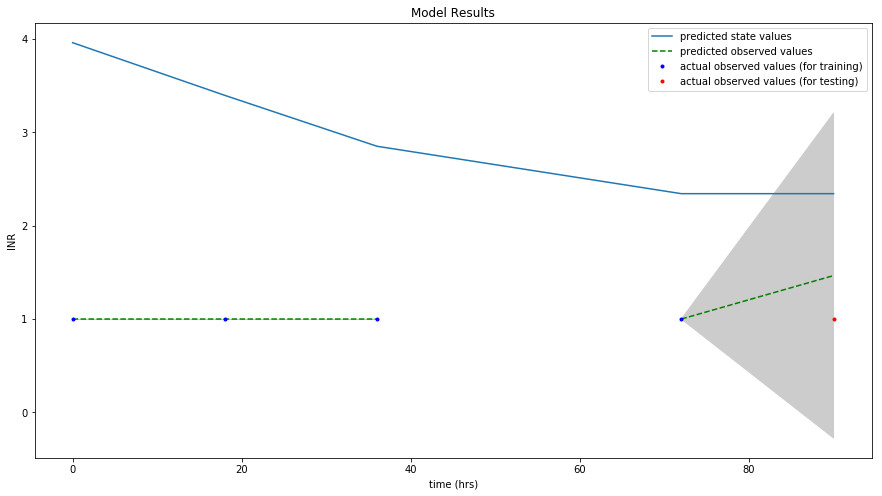

Patient 1356


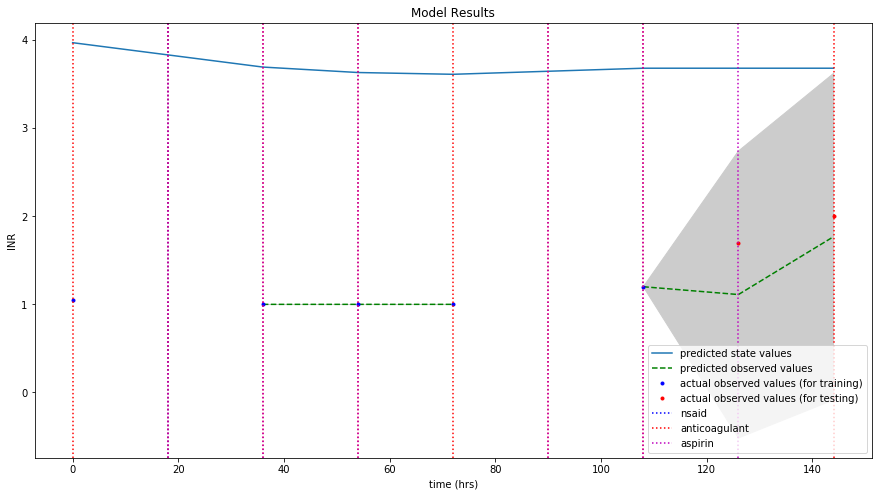

Patient 966


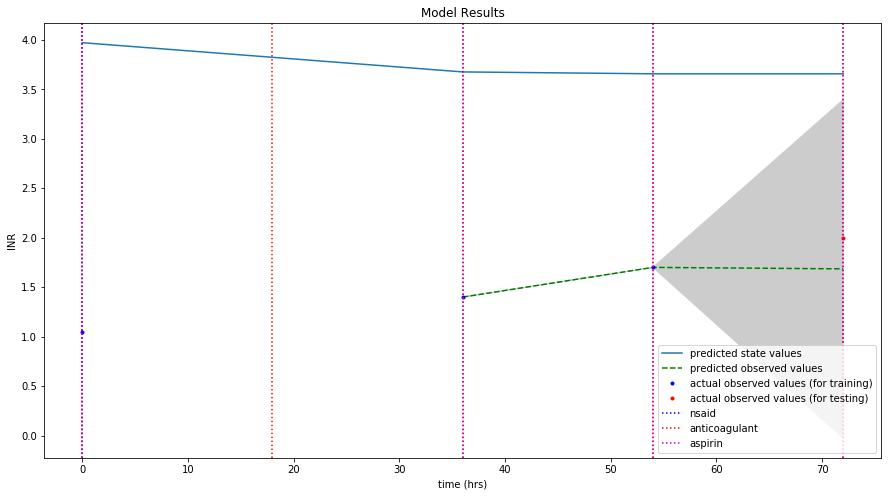

Patient 536


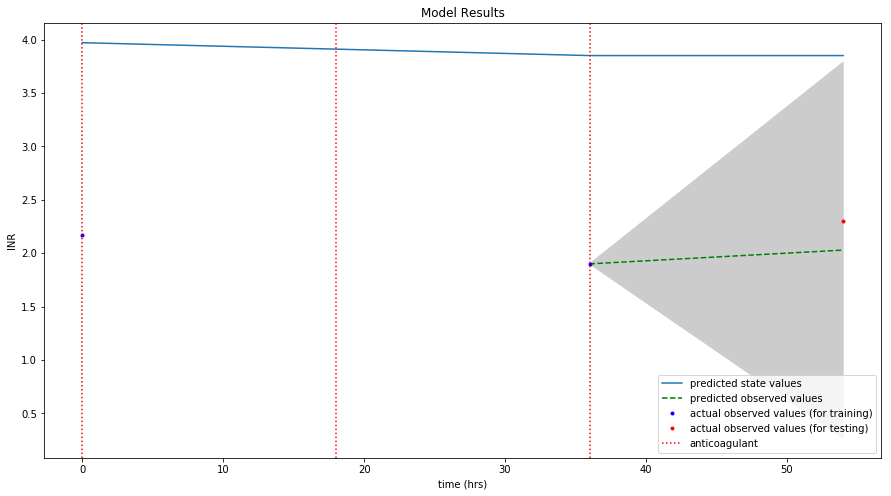

In [10]:
random_patients = np.random.randint(0, y.shape[0], 50)
for i in random_patients:
    plot(em, i, bin_size=bin_size)